# Analyzing the startup data

Which Location has most startup companies? - 
Which Investor has invested the most ?
Which is the maximum Investment type of all ?
Top 5 startups by the funding amount in dollars ?
Year by year growth of startups 
Number of fundings Startup got
Top 5 industries preferred ?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\CODEBASICS\Startups-Case-study\EDA on Finance Data\startup_funding.csv")

In [3]:
df.head()

Sr No Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0      1      09/01/2020                        BYJU’S               E-Tech   
1      2      13/01/2020                        Shuttl       Transportation   
2      3      09/01/2020                     Mamaearth           E-commerce   
3      4      02/01/2020  https://www.wealthbucket.in/              FinTech   
4      5      02/01/2020                        Fashor  Fashion and Apparel   

                             SubVertical City  Location  \
0                             E-learning      Bengaluru   
1              App based shuttle service        Gurgaon   
2  Retailer of baby and toddler products      Bengaluru   
3                      Online Investment      New Delhi   
4            Embroiled Clothes For Women         Mumbai   

              Investors Name       InvestmentnType Amount in USD Remarks  
0    Tiger Global Management  Private Equity Round  20,00,00,000     NaN  
1  Susquehanna Growth Equity              Series C     80,48,394     NaN  
2      Sequoia Capital India              Series B   1,83,58,860     NaN  
3             Vinod Khatumal          Pre-series A     30,00,000     NaN  
4    Sprout Venture Partners            Seed Round     18,00,000     NaN

In [4]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [5]:
df.rename(columns={"Date dd/mm/yyyy": "Date"}, inplace=True)
df.rename(columns={"City  Location": "Location"}, inplace=True)

In [6]:
df.isnull().sum()

Sr No                   0
Date                    0
Startup Name            0
Industry Vertical     171
SubVertical           936
Location              180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [7]:
df['Amount in USD'] = df['Amount in USD'].str.replace("0.0", "None")

In [8]:
# lets clean the strings
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

# lets apply the function to clean the data
for col in ["Startup Name", "Industry Vertical", "SubVertical", "Location", 
            "Investors Name", "InvestmentnType", "Amount in USD", "Remarks"]:
    df[col] = df[col].apply(lambda x: clean_string(x))
    
# lets check the head of the data
df.head()

Sr No        Date                  Startup Name    Industry Vertical  \
0      1  09/01/2020                        BYJU’S               E-Tech   
1      2  13/01/2020                        Shuttl       Transportation   
2      3  09/01/2020                     Mamaearth           E-commerce   
3      4  02/01/2020  https://www.wealthbucket.in/              FinTech   
4      5  02/01/2020                        Fashor  Fashion and Apparel   

                             SubVertical   Location  \
0                             E-learning  Bengaluru   
1              App based shuttle service    Gurgaon   
2  Retailer of baby and toddler products  Bengaluru   
3                      Online Investment  New Delhi   
4            Embroiled Clothes For Women     Mumbai   

              Investors Name       InvestmentnType Amount in USD Remarks  
0    Tiger Global Management  Private Equity Round  20,00,00,000     nan  
1  Susquehanna Growth Equity              Series C     80,48,394     nan  
2      Sequoia Capital India              Series B   1,83,58,860     nan  
3             Vinod Khatumal          Pre-series A     30,00,000     nan  
4    Sprout Venture Partners            Seed Round     18,00,000     nan

In [9]:
#Filling the null values
df['Industry Vertical'].fillna("None", inplace = True)
df['Location'].fillna("Remote/None" , inplace = True)
df['Investors Name'].fillna("None" , inplace = True)
df['InvestmentnType'].fillna("Bootstraped/None" , inplace = True)
df['Amount in USD'].fillna("0" , inplace = True)
df['Remarks'].fillna("None", inplace = True)

In [10]:
#Replacing the unknown terms with specified terms
df['Amount in USD'].replace({"N/A": "0", "Undisclosed": "0", "undisclosed": "0", "unknown": "0","nan":"0"}, inplace=True)
df['Remarks'].replace("nan","None", inplace = True)
df['SubVertical'].replace("nan","No information", inplace = True)
#df['Location'] = df['Location'].replace(("Bangalore":"Bengaluru"),("Gurgaon":"Gurugram"),("nan":"Remote"),regex = True)
df['Location'] = df['Location'].replace(('Bengaluru', 'nan'),('Bangalore','Remote'))
df['Investors Name'].replace("nan","None",inplace = True)
df['Industry Vertical'].replace("nan","None",inplace = True)

In [11]:
for i in range(0,len(df["Industry Vertical"])):
    if df["Industry Vertical"][i] in ["ECommerce",
                                       "ecommerce",
                                       "Ecommerce", 
                                       "E-Commerce",
                                       "E-commerce"]:
        df["Industry Vertical"][i]="eCommerce"
        
for i in range(0,len(df["Startup Name"])):
    if df["Startup Name"][i] in ["Ola",
                                  "Ola Cabs", 
                                  "Olacabs"]:
        df["Startup Name"][i]="Ola"  
    elif df["Startup Name"][i] =="Flipkart.com":
        df["Startup Name"][i]="Flipkart"    
    elif df["Startup Name"][i] =="Paytm Marketplace":
        df["Startup Name"][i]="Paytm"   
for i in range(0,len(df["Startup Name"])):
  if df["Investors Name"][i] in ['Undisclosed investors',
                                  'Undisclosed Investors',
                                  'Undisclosed',
                                  'Undisclosed investor',
                                  'Undisclosed Investor',
                                  'undisclosed investors']:
    df["Investors Name"][i]="Undisclosed"
    
for i in range(0,len(df["Startup Name"])):
    if df["Startup Name"][i] in ["OYO",
                                  "OYO Rooms", 
                                  "OyoRooms", 
                                  "Oyorooms", 
                                  "Oyo",
                                 "Oyo Rooms"]:
        df["Startup Name"][i]= "OYO Rooms"
    elif df["Startup Name"][i] in ["Byjuxe2x80x99s",
                                    "BYJU'S"]:
        df["Startup Name"][i]= "Byju's"    
    
for i in range  (0,len(df["Location"])):
    if df["Location"][i] in ["New Delhi",
                                   "Delhi",
                                   "Noida", 
                                   "Gurugram",
                                   "Gurgaon"]:
        df["Location"][i]="NCR"
    elif df["Location"][i]=="Bangalore":
        df["Location"][i]="Bengaluru"
        

    
df.loc[df['Location'].isin(['\\\\xc2\\\\xa0Noida', '\\xc2\\xa0Noida']), 'Location'] = 'Noida'
df.loc[df['Location'].isin(['\\\\xc2\\\\xa0Bangalore', '\\xc2\\xa0Bangalore', 'Bangalore']), 'Location'] = 'Bengaluru'
df.loc[df['Location'].isin(['\\\\xc2\\\\xa0New Delhi', '\\xc2\\xa0New Delhi']), 'Location'] = 'New Delhi'
df.loc[df['Location'].isin(['\\\\xc2\\\\xa0Gurgaon', 'Gurugram']), 'Location'] = 'Gurgaon'
df.loc[df['Location'].isin(['\\\\xc2\\\\xa0Mumbai', '\\xc2\\xa0Mumbai']), 'Location'] = 'Mumbai'

    

for i in range  (0,len(df["InvestmentnType"])):
    if df["InvestmentnType"][i] in ["Seed/ Angel Funding",
                                   "Seed / Angel Funding",
                                   "Seed/Angel Funding", 
                                   "Seed / Angle Funding","Angel / Seed Funding"]:        
        df["InvestmentnType"][i] = "Seed/Angel Funding"
    elif df["InvestmentnType"][i] in ["pre-Series A","Pre Series A","Pre-series A","pre-series A"]:
        df["InvestmentnType"][i] = "Pre-Series A"
    elif df["InvestmentnType"][i] in ["Private Equity","Private Equity Round","Private","PrivateEquity","Private\\nEquity","Private Funding"]:
        df["InvestmentnType"][i] = "Private-Equity"
    elif df["InvestmentnType"][i] in ["Seed\\nFunding","Seed Funding","Seed","Seed funding","Seed Funding Round","Seed Round"]:
        df["InvestmentnType"][i] = "Seed-Funding"        

df.loc[df['Industry Vertical'] == "\\\\xc2\\\\xa0News Aggregator mobile app", 'Industry Vertical'] = 'News Aggregator mobile app'
df.loc[df['Industry Vertical'] == "\\\\xc2\\\\xa0Online Jewellery Store", 'Industry Vertical'] = 'Online Jewellery Store'
df.loc[df['Industry Vertical'] == "\\\\xc2\\\\xa0Fashion Info Aggregator App", 'Industry Vertical'] = 'Fashion Info Aggregator App'
df.loc[df['Industry Vertical'] == "\\\\xc2\\\\xa0Online Study Notes Marketplace", 'Industry Vertical'] = 'Online Study Notes Marketplace'
df.loc[df['Industry Vertical'] == "\\\\xc2\\\\xa0Warranty Programs Service Administration", 'Industry Vertical'] = 'Warranty Programs Service Administration'
df.loc[df['Industry Vertical'] == "\\\\xc2\\\\xa0Pre-School Chain", 'Industry Vertical'] = 'Pre-School Chain'
df.loc[df['Industry Vertical'] == "\\\\xc2\\\\xa0Premium Loyalty Rewards Point Management", 'Industry Vertical'] = 'Premium Loyalty Rewards Point Management'
df.loc[df['Industry Vertical'] == "\\\\xc2\\\\xa0Contact Center Software Platform", 'Industry Vertical'] = 'Contact Center Software Platform'
df.loc[df['Industry Vertical'] == "\\\\xc2\\\\xa0Casual Dining restaurant Chain", 'Industry Vertical'] = 'Casual Dining restaurant Chain'
df.loc[df['Industry Vertical'] == "\\\\xc2\\\\xa0Online Grocery Delivery", 'Industry Vertical'] = 'Online Grocery Delivery'
df.loc[df['Industry Vertical'] == "Online home d\\\\xc3\\\\xa9cor marketplace", 'Industry Vertical'] = 'Online home decor marketplace'
df.loc[df['Industry Vertical'].isin(["Fin-Tech"]), 'Industry Vertical'] = 'FinTech'   

df.loc[df['Investors Name'].isin(['Undisclosed investors', 'Undisclosed', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed investors']), 'Investors Name'] = 'Undisclosed Investors'
df.loc[df['Investors Name'] == "\\\\xc2\\\\xa0Tiger Global", 'Investors Name'] = 'Tiger Global'
df.loc[df['Investors Name'] == "\\\\xc2\\\\xa0IndianIdeas.com", 'Investors Name'] = 'IndianIdeas'
df.loc[df['Investors Name'] == "\\\\xc2\\\\xa0IvyCap Ventures, Accel Partners, Dragoneer Investment Group", 'Investors Name'] = 'IvyCap Ventures, Accel Partners, Dragoneer Investment Group'
df.loc[df['Investors Name'] == "\\\\xc2\\\\xa0Goldman Sachs", 'Investors Name'] = 'Goldman Sachs'

In [12]:
pd.set_option('display.max_rows' , None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth' , None)

In [13]:
df["Remarks"].value_counts().head()

Remarks
None            2625
Series A         177
Series B          64
Pre-Series A      37
Series C          28
Name: count, dtype: int64

In [14]:
df['Amount in USD'].value_counts().sum()

3044

In [15]:
## Cleaning the dates

df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'][df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'][df['Date']=='22/01//2015'] = '22/01/2015'
df['Date'][df['Date']=='05/072018'] = '05/07/2018'
df['Date'][df['Date']=='01/07/015'] = '01/07/2015'
df['Date'][df['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [16]:
df.isnull().sum()

Sr No                0
Date                 0
Startup Name         0
Industry Vertical    0
SubVertical          0
Location             0
Investors Name       0
InvestmentnType      0
Amount in USD        0
Remarks              0
dtype: int64

In [17]:
df['SubVertical'].value_counts().head()

SubVertical
No information              936
Online Lending Platform      11
Online Pharmacy              10
Food Delivery Platform        8
Online Learning Platform      5
Name: count, dtype: int64

# Which month got the maximum funding?

Number of funding per month in decreasing order(Top 10)
 yearmonth
201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: count, dtype: int64


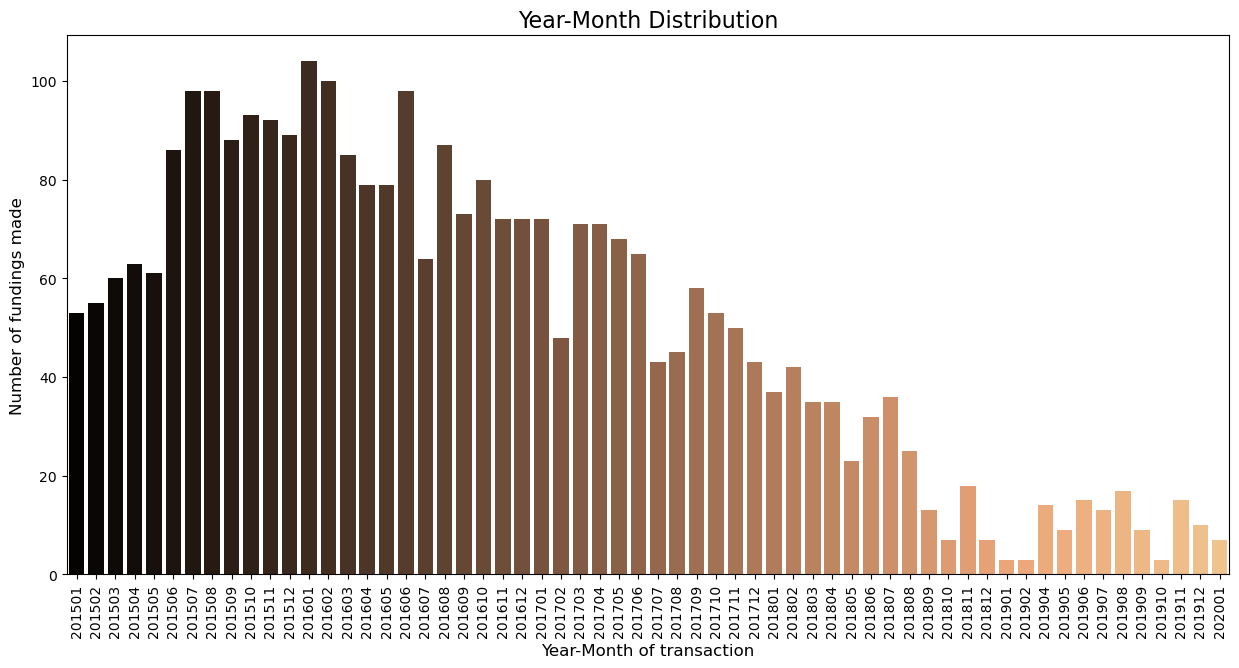

In [18]:
# some of the date formats are written wrongly so we have to clean them thoroughly so that we can analyze these values

# converting them into a Datetime object
df["yearmonth"] = (pd.to_datetime(df['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)


temp = df['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = df['yearmonth'].value_counts()

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

# Which Investor has invested the most ?

In [20]:
i=df['Investors Name'].value_counts().head(11).reset_index()
i.columns=["Investors Name", "Number"]
i.head(5)

Investors Name  Number
0  Undisclosed Investors     112
1             Ratan Tata      25
2                   None      24
3   Indian Angel Network      24
4        Kalaari Capital      16

In [21]:
i.drop(0,axis=0,inplace=True)
i.drop(2,axis=0,inplace=True)

In [22]:
label10 = 'blue'
fig = go.Figure(data=[go.Scatter(x=i['Investors Name'], y=i['Number'], mode='markers', marker_size=(i['Number']) * 3, marker={'color': label10})])
fig.update_layout(autosize=True, plot_bgcolor='rgb(275, 275, 275)')
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"
fig.show()

# Which City has the maximum number of startups companies ?

Location
NCR          892
Bengaluru    842
Mumbai       568
Remote       180
Pune         105
Hyderabad     99
Chennai       97
Ahmedabad     38
Jaipur        30
Kolkata       21
Name: count, dtype: int64


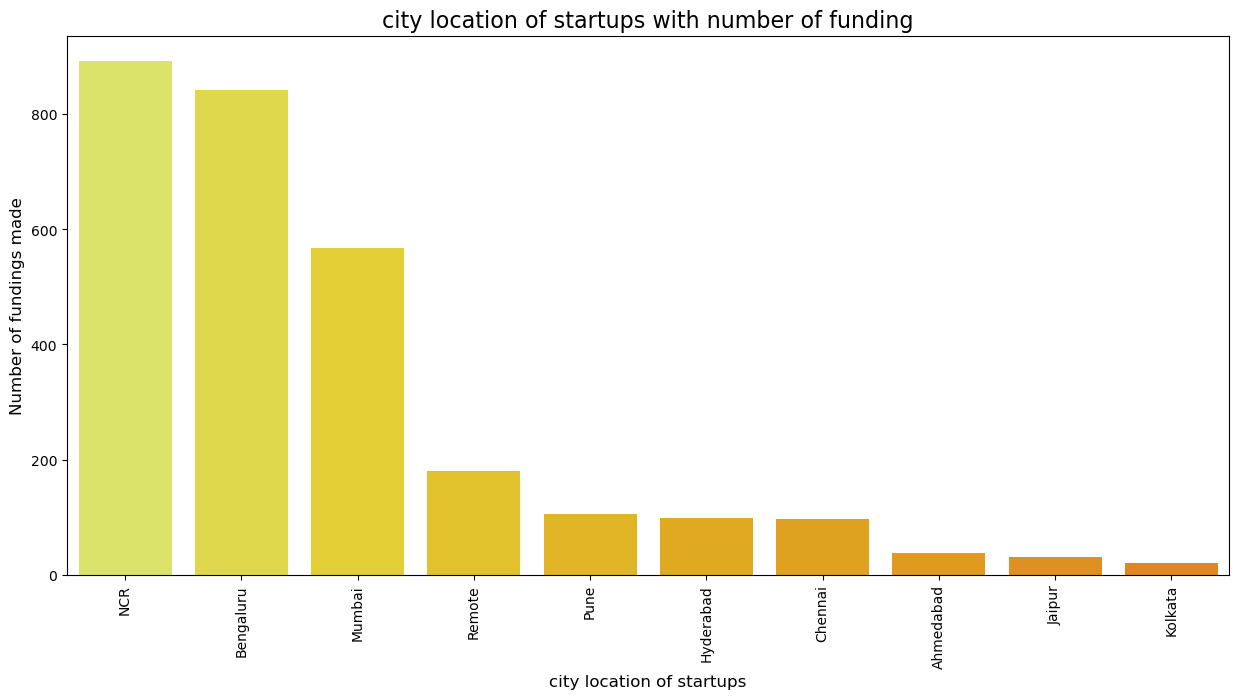

In [23]:
df['Location'].value_counts().head(10)
city = df['Location'].value_counts().head(10)
print(city)

# lets plot the data
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

# Top 10 startups by the funding amount in dollars ?


In [24]:
startup_fund = df.groupby('Amount in USD')['Startup Name']

In [25]:
df.sort_values('Amount in USD')

Sr No        Date  \
2268   2269  24/11/2015   
1037   1038  24/02/2017   
1036   1037  23/02/2017   
2110   2111  01/12/2015   
2113   2114  01/12/2015   
2116   2117  02/12/2015   
1029   1030  17/02/2017   
1028   1029  17/02/2017   
1038   1039  27/02/2017   
2117   2118  03/12/2015   
2121   2122  03/12/2015   
1020   1021  15/02/2017   
1019   1020  14/02/2017   
2125   2126  04/12/2015   
2126   2127  07/12/2015   
2129   2130  07/12/2015   
2132   2133  08/12/2015   
2120   2121  03/12/2015   
2109   2110  01/12/2015   
2107   2108  30/01/2016   
2106   2107  30/01/2016   
1069   1070  16/01/2017   
1067   1068  16/01/2017   
1066   1067  14/01/2017   
2095   2096  28/01/2016   
2096   2097  28/01/2016   
1063   1064  13/01/2017   
2097   2098  29/01/2016   
1059   1060  11/01/2017   
1056   1057  10/01/2017   
2099   2100  29/01/2016   
2104   2105  29/01/2016   
1049   1050  05/01/2017   
1048   1049  05/01/2017   
1047   1048  04/01/2017   
1046   1047  03/01/2017   
1045   1046  03/01/2017   
2105   2106  29/01/2016   
2133   2134  08/12/2015   
2136   2137  09/12/2015   
1010   1011  10/02/2017   
2139   2140  09/12/2015   
978     979  28/03/2017   
976     977  27/03/2017   
974     975  24/03/2017   
2166   2167  16/12/2015   
969     970  22/03/2017   
2169   2170  17/12/2015   
965     966  17/03/2017   
2171   2172  18/12/2015   
2172   2173  18/12/2015   
962     963  16/03/2017   
2177   2178  22/12/2015   
958     959  14/03/2017   
957     958  10/03/2017   
2178   2179  22/12/2015   
955     956  10/03/2017   
2179   2180  22/12/2015   
2181   2182  22/12/2015   
980     981  29/03/2017   
2092   2093  27/01/2016   
2161   2162  15/12/2015   
983     984  29/03/2017   
1007   1008  09/02/2017   
2145   2146  10/12/2015   
2149   2150  11/12/2015   
1004   1005  08/02/2017   
2150   2151  11/12/2015   
2151   2152  11/12/2015   
998     999  06/02/2017   
996     997  03/02/2017   
995     996  02/02/2017   
2153   2154  11/12/2015   
993     994  31/03/2017   
992     993  31/03/2017   
2155   2156  11/12/2015   
988     989  30/03/2017   
987     988  30/03/2017   
986     987  30/03/2017   
2157   2158  14/12/2015   
2160   2161  15/12/2015   
2089   2090  27/01/2016   
2088   2089  25/01/2016   
2085   2086  22/01/2016   
2032   2033  11/01/2016   
1159   1160  19/12/2016   
2035   2036  11/01/2016   
2037   2038  12/01/2016   
1151   1152  14/12/2016   
1150   1151  14/12/2016   
1147   1148  14/12/2016   
1145   1146  13/12/2016   
1142   1143  12/12/2016   
2043   2044  13/01/2016   
2045   2046  13/01/2016   
2046   2047  14/01/2016   
1136   1137  09/12/2016   
2047   2048  14/01/2016   
2049   2050  14/01/2016   
2050   2051  15/01/2016   
1132   1133  07/12/2016   
1162   1163  20/12/2016   
2052   2053  15/01/2016   
1163   1164  20/12/2016   
2030   2031  09/01/2016   
1191   1192  02/11/2016   
1190   1191  02/11/2016   
2021   2022  07/01/2016   
2022   2023  07/01/2016   
1186   1187  30/12/2016   
1185   1186  29/12/2016   
1184   1185  29/12/2016   
1182   1183  28/12/2016   
1178   1179  26/12/2016   
1177   1178  26/12/2016   
1176   1177  23/12/2016   
1175   1176  23/12/2016   
1174   1175  23/12/2016   
1173   1174  23/12/2016   
2029   2030  08/01/2016   
1169   1170  22/12/2016   
1167   1168  21/12/2016   
1165   1166  21/12/2016   
951     952  08/03/2017   
2053   2054  15/01/2016   
1128   1129  07/12/2016   
2072   2073  21/01/2016   
1094   1095  24/01/2017   
1093   1094  23/01/2017   
1091   1092  23/01/2017   
1090   1091  23/01/2017   
2078   2079  22/01/2016   
1088   1089  20/01/2017   
1087   1088  20/01/2017   
1086   1087  20/01/2017   
1085   1086  20/01/2017   
1084   1085  19/01/2017   
1083   1084  19/01/2017   
1081   1082  19/01/2017   
2080   2081  22/01/2016   
2081   2082  22/01/2016   
1078   1079  18/01/2017   
1077   1078  18/01/2017   
1098   1099  24/01/2017   
1129   1130  07/12/2016   
1099   1100  25/01/2017   
1101   1102  25/01/2017   
1127   112

In [26]:
import re

df.drop([2602,2603,2604,2605,2606,2607,2608,2609,2610,2611], inplace = True)
df.reset_index(drop=True, inplace=True)

for i in range (0, len(df["Amount in USD"])):
    df["Amount in USD"][i]=re.sub('\D',"",str(df["Amount in USD"][i]))
df["Amount in USD"]=pd.to_numeric(df["Amount in USD"])

for i in range (0, len(df["Startup Name"])):
    df["Startup Name"][i]=re.sub('xc2xa0',"",str(df["Startup Name"][i]))


In [27]:
#rapido taxi information was wrong it was inn Indian Rupees
df["Amount in USD"][df["Startup Name"]=="Rapido Bike Taxi"]=df["Amount in USD"]/71.19
startup_names = df["Startup Name"]
temp['Startup Name'] = startup_names
temp=df[["Startup Name","Amount in USD"]].groupby("Startup Name").sum().sort_values(by="Amount in USD", ascending=False)
top=temp.head(10)
print(top)

              Amount in USD
Startup Name               
Flipkart       4.759700e+09
Paytm          3.348950e+09
Ola            2.054200e+09
OYO Rooms      9.970000e+08
Udaan          8.700000e+08
Snapdeal       7.000000e+08
True North     6.000000e+08
BigBasket      5.070000e+08
FabHotels      4.969976e+08
GOQii          4.500000e+08


# Most preferred Industries as per Indian Startup companies

In [29]:
# top_n = 10  # Display the top N startups

# # Select the top N startups
# top = temp.head(top_n)

# # Create a bar chart
# plt.figure(figsize=(12, 6))  # Set the figure size (adjust as needed)
# plt.barh(top['Startup Name'], top['Amount in USD'], color='skyblue')  # Use barh for horizontal bars
# plt.xlabel('Total Amount in USD')
# plt.ylabel('Startup Name')
# plt.title('Top 10 Startups by Total Amount in USD')
# plt.gca().invert_yaxis()  # Invert the y-axis to display the highest amount at the top
# plt.tight_layout()
# plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr No              3034 non-null   int64  
 1   Date               3034 non-null   object 
 2   Startup Name       3034 non-null   object 
 3   Industry Vertical  3034 non-null   object 
 4   SubVertical        3034 non-null   object 
 5   Location           3034 non-null   object 
 6   Investors Name     3034 non-null   object 
 7   InvestmentnType    3034 non-null   object 
 8   Amount in USD      3034 non-null   float64
 9   Remarks            3034 non-null   object 
 10  yearmonth          3034 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 249.0+ KB


In [31]:
#i=df['Investors Name'].value_counts().head(11).reset_index()
#i.columns=["Investors Name", "Number"]
#i.head(5)

iv = df['Industry Vertical'].value_counts().head().reset_index()
iv.columns=["Investors Name", "Number"]
print(iv)

      Investors Name  Number
0  Consumer Internet     941
1         Technology     478
2          eCommerce     299
3               None     171
4         Healthcare      70


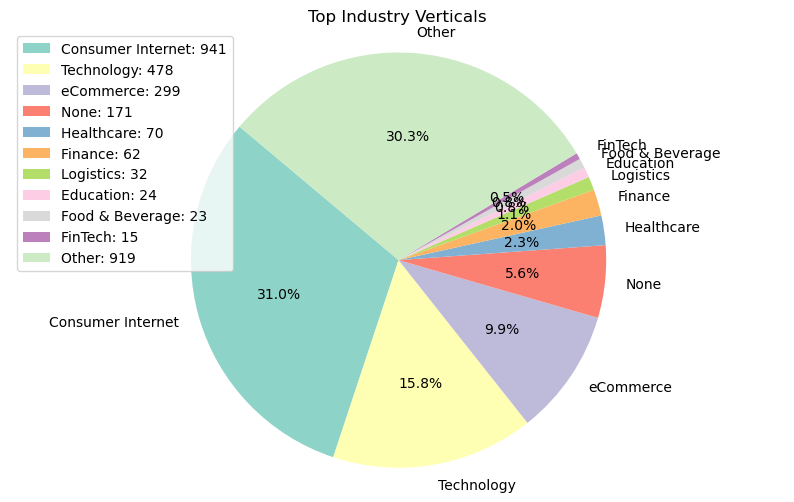

In [32]:
top_n = 10  # Display the top N categories

# Get the top N categories by count
top_categories = df['Industry Vertical'].value_counts().head(top_n)

# Sum counts of remaining categories and create an 'Other' category
other_count = df['Industry Vertical'].value_counts().sum() - top_categories.sum()
top_categories['Other'] = other_count

# Define a custom color palette (adjust colors as needed)
custom_palette = sns.color_palette("Set3", len(top_categories))

# Explode a slice (e.g., 'Other') for better labeling
# explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Create a pie chart with the custom color palette and explode
plt.figure(figsize=(10, 6))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=custom_palette)
plt.title('Top Industry Verticals')

# Add a legend to display category labels and counts
plt.legend(labels=[f'{cat}: {count}' for cat, count in zip(top_categories.index, top_categories)])
plt.axis('equal')

plt.show()


# Distribution of types of investment fundings among Startups companies

In [33]:
it = df['InvestmentnType'].value_counts().reset_index().head(10)
print(it)

      InvestmentnType  count
0        Seed-Funding   1363
1      Private-Equity   1358
2  Seed/Angel Funding    141
3      Seed\\nFunding     30
4        Debt Funding     25
5            Series A     24
6            Series B     20
7            Series C     14
8            Series D     12
9        Pre-Series A      9


In [34]:
it.drop(3,axis=0,inplace=True)

In [35]:
it.head(10)

InvestmentnType  count
0        Seed-Funding   1363
1      Private-Equity   1358
2  Seed/Angel Funding    141
4        Debt Funding     25
5            Series A     24
6            Series B     20
7            Series C     14
8            Series D     12
9        Pre-Series A      9

In [36]:
it.columns

Index(['InvestmentnType', 'count'], dtype='object')

<AxesSubplot:xlabel='InvestmentnType'>

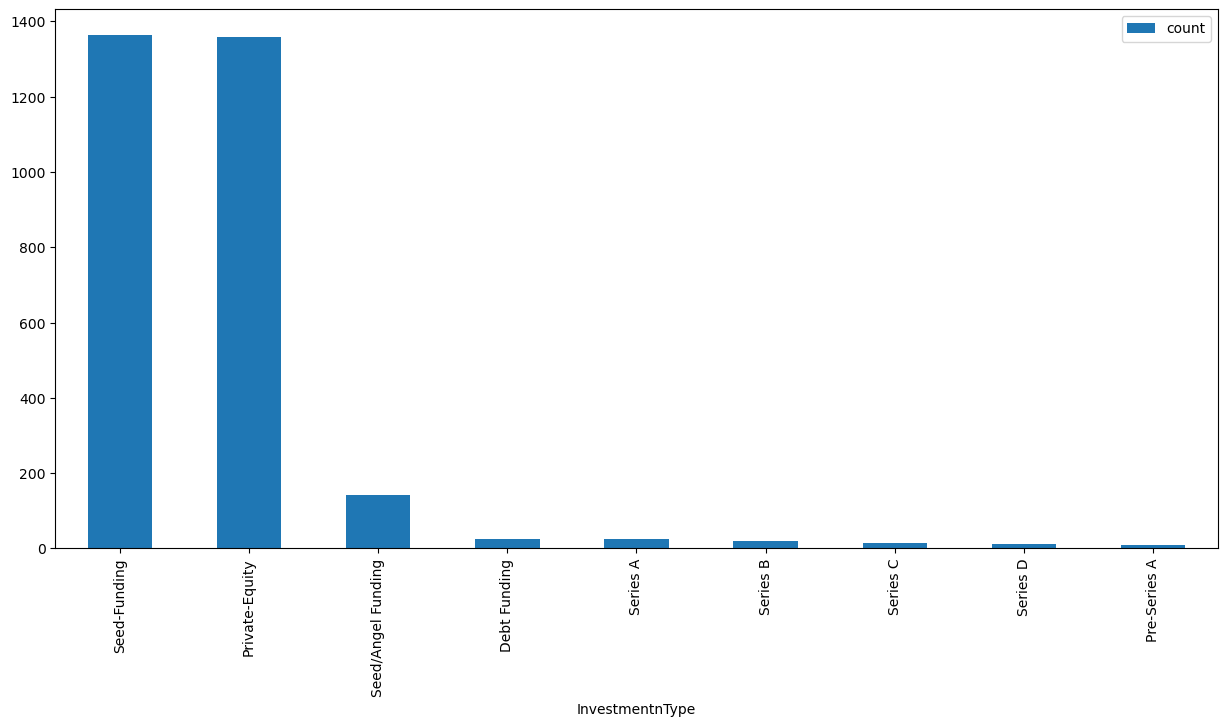

In [43]:
it.plot(x = 'InvestmentnType', y = 'count', kind = 'bar')

# CONCLUSIONS

#### FROM ABOVE ANALYSIS WE CONCLUDE THAT
1].IN THE JANUARY MONTH IN 2016 MAXIMU FUNDINGS WERE DISTRIBUTED
2].RATAN TATA INVESTED IN MOST OF THE COMPANIES WITH 25 INVESTMENTS
3].NCR IS THE NUMBER 1 CHOICE TO START THE COMPANIES
4].FLIPKART GOT MAXIMUM FUNDING WITH 4.7597 billion
5].MAXIMUM COMPANIES HAVE INTEREST IN CONSUMER INTERNET TYPE OF BUSINESSES FOLLOWED BY TECHNOLOGY , E-COMMERCE, HEALTHCARE ,        FINANCE.
6].MAXIMUM COMPANIES GOT SEED FUNDING FROM THE INVESTORS